In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Подготовка данных

In [2]:
df = pd.read_csv('../csv/SBER_101001_201001_1d.csv',
		delimiter=',',
		parse_dates=[[0,1]],
		index_col=0,
		names=['Date','Time','Open', 'High', 'Low', 'Close', 'Volume'],
		header=0,
		encoding='utf-8'
	)

In [3]:
df['Buy'] = (df['Close']-df['Open'])/df['Open']
df['Sell'] = (df['Open']-df['Close'])/df['Open']

# Вспомогательные функции

In [4]:
def calc_n_days(values, n):
    """Проверяет есть ли n дней подряд открытия или закрытия для покупок или продаж.

    Args:
		values [list of float]: массив разницы в % между открытием и закрытие за n предыдущих дней
        n [int]: количество дней, за которые нужно проверять

	Returns:
		[float]: разница в % между открытием и закрытием за текущий день (или NaN)
    """
    if (values[:n] < 0).all():
        return values[-1]
    else:
        return np.nan

In [5]:
def calc_n_days_buysell(values, n):
    """Проверяет есть ли n дней подряд открытия или закрытия для покупок и продаж вместе.

    Args:
		values [list of float]: массив разницы в % между открытием и закрытие за n предыдущих дней
        n [int]: количество дней, за которые нужно проверять

	Returns:
		[float]: разница в % между открытием и закрытием за текущий день c учетом покупки или продажи (или NaN)
    """

    if (values[:n] < 0).all():
        return values[-1]
    elif (values[:n] > 0).all():
        return -1*values[-1]
    else:
        return np.nan

# Основной цикл для рассчёта

In [6]:
# n - количество дней, цикл считает до n-1
for n in tqdm(range(1,6)):
    buy_n_days = 'Buy_'+str(n)+'_Days'
    sell_n_days = 'Sell_'+str(n)+'_Days'
    buysell_n_days = 'Buysell_'+str(n)+'_Days'
    equity_buy = 'Equity_'+buy_n_days    
    equity_sell = 'Equity_'+sell_n_days    
    equity_buysell = 'Equity_'+buysell_n_days

    df[buy_n_days] = df['Buy'].rolling(n+1).apply(calc_n_days, args=(n,))
    df[equity_buy] = df[buy_n_days].cumsum().apply(np.exp)

    df[sell_n_days] = df['Sell'].rolling(n+1).apply(calc_n_days, args=(n,))
    df[equity_sell] = df[sell_n_days].cumsum().apply(np.exp)

    df[buysell_n_days] = df['Buy'].rolling(n+1).apply(calc_n_days_buysell, args=(n,))
    df[equity_buysell] = df[buysell_n_days].cumsum().apply(np.exp)
    

100%|██████████| 5/5 [01:30<00:00, 18.16s/it]


# Графики

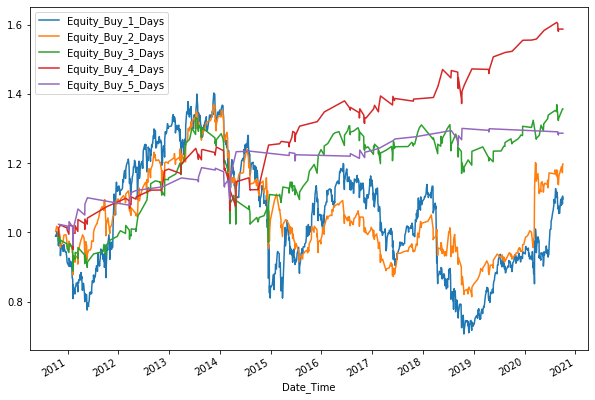

In [7]:
df[[
    'Equity_Buy_1_Days',
    'Equity_Buy_2_Days',
    'Equity_Buy_3_Days',
    'Equity_Buy_4_Days',
    'Equity_Buy_5_Days'
]].interpolate(method='index').plot(figsize=(10,7))


In [8]:
df[[
    'Equity_Buy_1_Days',
    'Equity_Buy_2_Days',
    'Equity_Buy_3_Days',
    'Equity_Buy_4_Days',
    'Equity_Buy_5_Days'
]].count()

Equity_Buy_1_Days    1291
Equity_Buy_2_Days     626
Equity_Buy_3_Days     294
Equity_Buy_4_Days     142
Equity_Buy_5_Days      69
dtype: int64

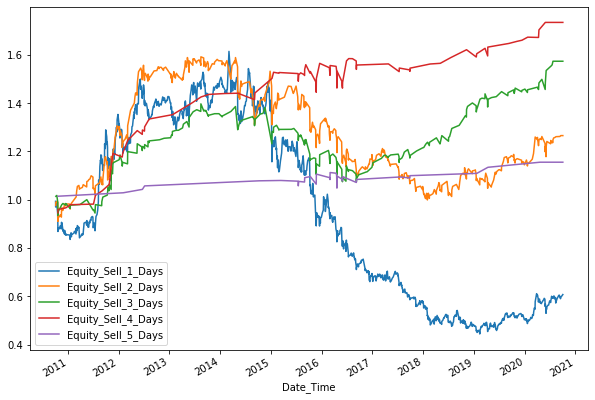

In [9]:
df[[
    'Equity_Sell_1_Days',
    'Equity_Sell_2_Days',
    'Equity_Sell_3_Days',
    'Equity_Sell_4_Days',
    'Equity_Sell_5_Days'
]].interpolate(method='index').plot(figsize=(10,7))


In [10]:
df[[
    'Equity_Sell_1_Days',
    'Equity_Sell_2_Days',
    'Equity_Sell_3_Days',
    'Equity_Sell_4_Days',
    'Equity_Sell_5_Days'
]].count()

Equity_Sell_1_Days    1212
Equity_Sell_2_Days     547
Equity_Sell_3_Days     238
Equity_Sell_4_Days      91
Equity_Sell_5_Days      33
dtype: int64

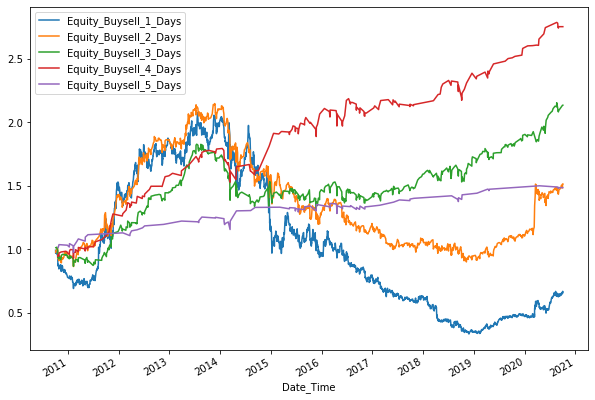

In [11]:
df[[
    'Equity_Buysell_1_Days',
    'Equity_Buysell_2_Days',
    'Equity_Buysell_3_Days',
    'Equity_Buysell_4_Days',
    'Equity_Buysell_5_Days'
]].interpolate(method='index').plot(figsize=(10,7))


In [12]:
df[[
    'Equity_Buysell_1_Days',
    'Equity_Buysell_2_Days',
    'Equity_Buysell_3_Days',
    'Equity_Buysell_4_Days',
    'Equity_Buysell_5_Days'
]].count()

Equity_Buysell_1_Days    2503
Equity_Buysell_2_Days    1173
Equity_Buysell_3_Days     532
Equity_Buysell_4_Days     233
Equity_Buysell_5_Days     102
dtype: int64